In [164]:
import sys
sys.path.insert(0,'C:\\Coding\\Local_repositories\\Exammmmm\\')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

plt.style("seaborn-muted")
# pd.set_option('display.float_format', '{:.4f}'.format) # 4 decimals are shown in pandas dataframes

from OwnCodeLib import four_deci

TypeError: 'module' object is not callable

# Optimizing portfolios

In [155]:
# Load data

asset = {}

for i in range(1, 11):
    asset[i] = pd.read_csv("C:\\Coding\\Local_repositories\\Exammmmm\\ExamData\\asset_{}.csv".format(i), index_col = 0).transpose()

In [156]:
# Linear and cumulative returns and log returns

lin_ret = {}
cum_lin_ret = {}
log_ret = {}
cum_log_ret = {}

for i in asset:
    lin_ret[i] = asset[i][:] / asset[i][:].shift(1) - 1
    cum_lin_ret[i] = (lin_ret[i] + 1).cumprod() - 1
    log_ret[i] = np.log(asset[i][:] / asset[i][:].shift(1))
    cum_log_ret[i] = log_ret[i].cumsum()

In [157]:
# Descriptive stats 1 year horizon

horizon = 1
columns = ["Mean", "Standard deviation", "Skewness", "Kurtosis", "5th percentile", "95th percentile"]
oneypricedescr = pd.DataFrame(columns = columns, index = range(1, 11))
oneyretdescr = pd.DataFrame(columns = columns, index = range(1, 11))

for i, j in zip(asset, range(1, 11)):
    oneypricedescr["Mean"].loc[j] = (asset[i].iloc[horizon, :].mean())
    oneypricedescr["Standard deviation"].loc[j] = (asset[i].iloc[horizon, :].std())
    oneypricedescr["Skewness"].loc[j] = (asset[i].iloc[horizon, :].skew())
    oneypricedescr["Kurtosis"].loc[j] = (asset[i].iloc[horizon, :].kurtosis())
    oneypricedescr["5th percentile"].loc[j] = (asset[i].iloc[horizon, :].quantile(0.05))
    oneypricedescr["95th percentile"].loc[j] = (asset[i].iloc[horizon, :].quantile(0.95))
    oneyretdescr["Mean"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].mean())
    oneyretdescr["Standard deviation"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].std())
    oneyretdescr["Skewness"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].skew())
    oneyretdescr["Kurtosis"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].kurtosis())
    oneyretdescr["5th percentile"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].quantile(0.05))
    oneyretdescr["95th percentile"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].quantile(0.95))   
print(oneypricedescr.to_latex())
print(oneyretdescr.to_latex())

\begin{tabular}{lllllll}
\toprule
{} &      Mean & Standard deviation &  Skewness &  Kurtosis & 5th percentile & 95th percentile \\
\midrule
1  &  1.092798 &           0.189981 &  0.160498 &  0.285135 &       0.784331 &        1.412145 \\
2  &  1.095515 &           0.192603 &  0.185659 &  0.265471 &       0.787527 &        1.421149 \\
3  &  1.091915 &           0.191742 &  0.197202 &   0.23909 &       0.782972 &        1.409817 \\
4  &  1.085131 &            0.18128 &  0.158357 &  0.394116 &        0.78924 &        1.389107 \\
5  &  1.070206 &           0.153326 &  0.040871 &  0.344938 &       0.814935 &        1.321808 \\
6  &  1.063204 &           0.140139 & -0.075311 &  0.338187 &       0.827722 &         1.29009 \\
7  &  1.061836 &           0.140387 & -0.066703 &  0.308762 &       0.823161 &         1.28449 \\
8  &  1.056576 &           0.127525 & -0.133624 &  0.365465 &       0.839421 &        1.259829 \\
9  &  1.056067 &           0.128044 & -0.129932 &  0.383646 &       0.83905

In [158]:
# Descriptive stats 5 year horizon

horizon = 5
columns = ["Mean", "Standard deviation", "Skewness", "Kurtosis", "5th percentile", "95th percentile"]
fiveypricedescr = pd.DataFrame(columns = columns, index = range(1, 11))
fiveyretdescr = pd.DataFrame(columns = columns, index = range(1, 11))

for i, j in zip(asset, range(1, 11)):
    fiveypricedescr["Mean"].loc[j] = (asset[i].iloc[horizon, :].mean())
    fiveypricedescr["Standard deviation"].loc[j] = (asset[i].iloc[horizon, :].std())
    fiveypricedescr["Skewness"].loc[j] = (asset[i].iloc[horizon, :].skew())
    fiveypricedescr["Kurtosis"].loc[j] = (asset[i].iloc[horizon, :].kurtosis())
    fiveypricedescr["5th percentile"].loc[j] = (asset[i].iloc[horizon, :].quantile(0.05))
    fiveypricedescr["95th percentile"].loc[j] = (asset[i].iloc[horizon, :].quantile(0.95))
    fiveyretdescr["Mean"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].mean())
    fiveyretdescr["Standard deviation"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].std())
    fiveyretdescr["Skewness"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].skew())
    fiveyretdescr["Kurtosis"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].kurtosis())
    fiveyretdescr["5th percentile"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].quantile(0.05))
    fiveyretdescr["95th percentile"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].quantile(0.95))   
print(fiveypricedescr.to_latex())
print(fiveyretdescr.to_latex())

\begin{tabular}{lllllll}
\toprule
{} &      Mean & Standard deviation &  Skewness &  Kurtosis & 5th percentile & 95th percentile \\
\midrule
1  &  1.544342 &           0.630468 &  1.052919 &  1.880734 &       0.711896 &        2.709996 \\
2  &  1.544306 &           0.629056 &  1.106931 &   2.42783 &       0.711857 &        2.709659 \\
3  &  1.535913 &           0.618368 &  1.094611 &   2.25201 &       0.726861 &        2.696267 \\
4  &  1.489003 &           0.569249 &  0.991692 &  1.810616 &       0.717818 &        2.549393 \\
5  &  1.390207 &           0.455167 &  0.809633 &   1.42071 &       0.750819 &        2.217411 \\
6  &  1.348795 &           0.410607 &  0.742998 &  1.121342 &       0.759814 &         2.07698 \\
7  &  1.342453 &           0.406595 &  0.743284 &  1.245541 &       0.761049 &        2.069306 \\
8  &  1.307352 &           0.364608 &   0.55645 &  0.515262 &       0.771279 &        1.967565 \\
9  &  1.303866 &           0.360752 &  0.589246 &  0.719585 &       0.76978

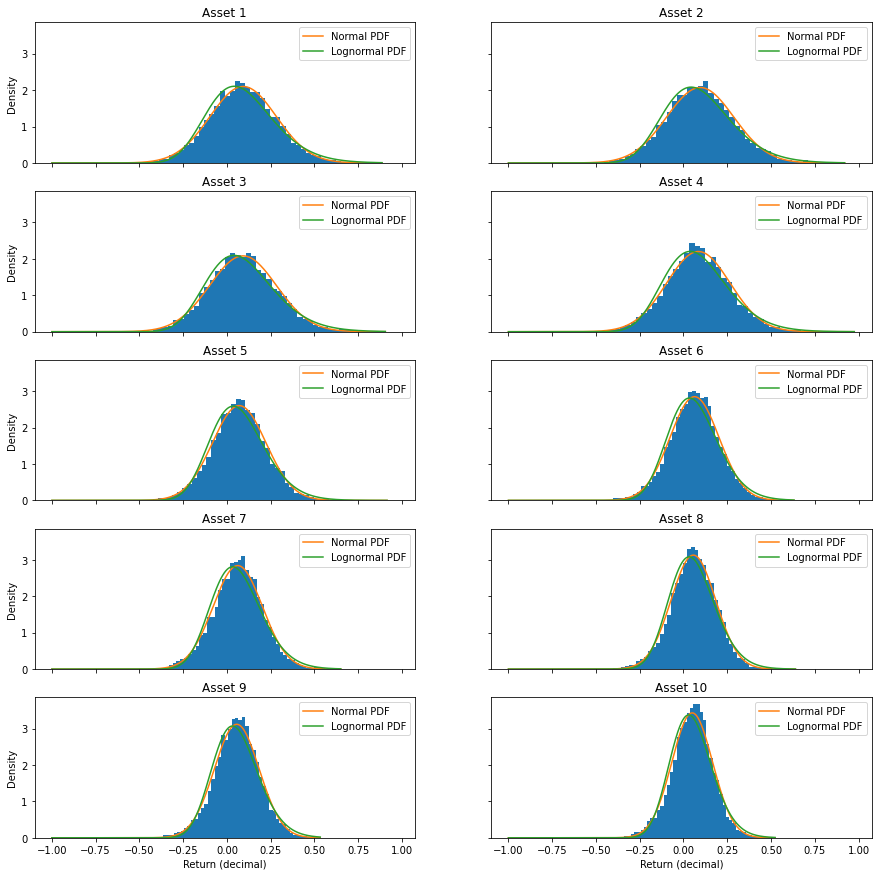

In [163]:
# 1 year return distributions

horizon = 1
bins = 50

fig, ax = plt.subplots(5, 2, figsize = (15, 15), sharex = True, sharey = True)
order_one = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4]
order_two = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

for j, k, i in zip(order_one, order_two, range(1, 11)):
    x = np.linspace(start = -1, stop = cum_lin_ret[i].iloc[horizon, :].max(), num = 1000)
    ax[j][k].hist(cum_lin_ret[i].iloc[horizon, :], bins = bins, density = True)
    ax[j][k].plot(x, stats.norm.pdf(x, loc = cum_lin_ret[i].iloc[horizon, :].mean(), scale = cum_lin_ret[i].iloc[horizon, :].std()), label = "Normal PDF")
    ax[j][k].plot(x, stats.lognorm.pdf(x + 1, scale = np.exp(cum_log_ret[i].iloc[horizon, :].mean()), s = cum_log_ret[i].iloc[horizon, :].std()), label = "Lognormal PDF")
    
    ax[j][k].set_title("Asset {}".format(i))
    ax[j][k].legend()

ax[4][0].set_xlabel("Return (decimal)") 
ax[4][1].set_xlabel("Return (decimal)")     
    
ax[0][0].set_ylabel("Density")
ax[1][0].set_ylabel("Density") 
ax[2][0].set_ylabel("Density") 
ax[3][0].set_ylabel("Density") 
ax[4][0].set_ylabel("Density") 

plt.show()

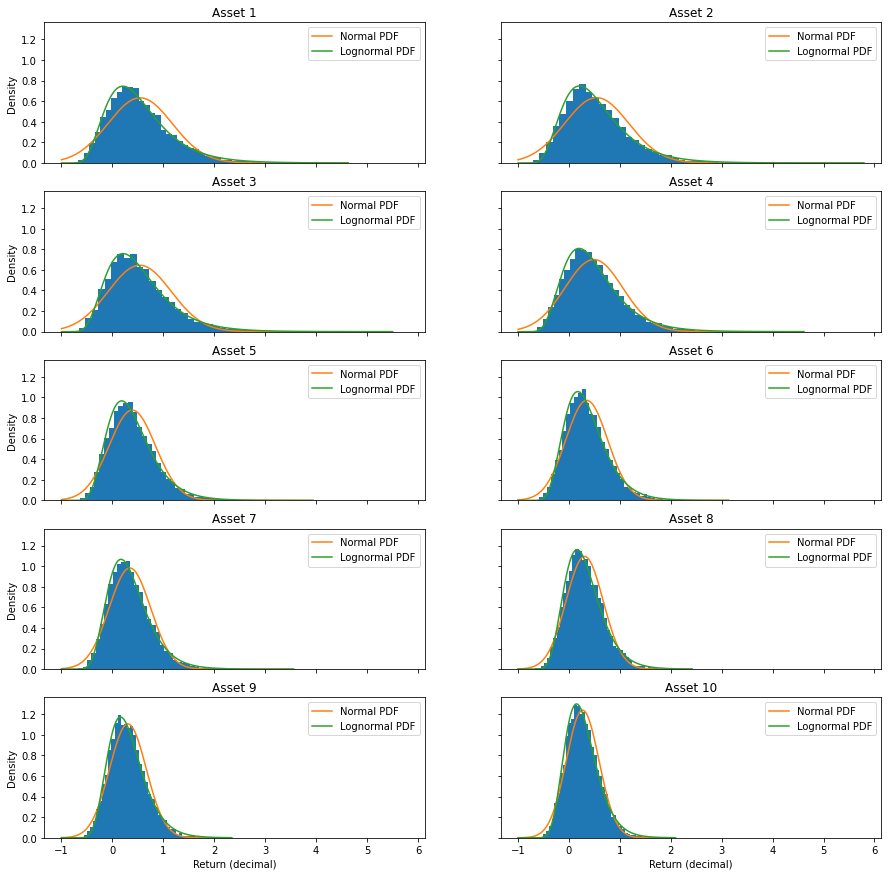

In [162]:
# 5 year return distributions

horizon = 5
lims = [-0.75, 0.75]
bins = 50

fig, ax = plt.subplots(5, 2, figsize = (15, 15), sharex = True, sharey = True)
order_one = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4]
order_two = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

for j, k, i in zip(order_one, order_two, range(1, 11)):
    x = np.linspace(start = -1, stop = cum_lin_ret[i].iloc[horizon, :].max(), num = 1000)
    ax[j][k].hist(cum_lin_ret[i].iloc[horizon, :], bins = bins, density = True)
    ax[j][k].plot(x, stats.norm.pdf(x, loc = cum_lin_ret[i].iloc[horizon, :].mean(), scale = cum_lin_ret[i].iloc[horizon, :].std()), label = "Normal PDF")
    ax[j][k].plot(x, stats.lognorm.pdf(x + 1, scale = np.exp(cum_log_ret[i].iloc[horizon, :].mean()), s = cum_log_ret[i].iloc[horizon, :].std()), label = "Lognormal PDF")
    
    ax[j][k].set_title("Asset {}".format(i))
    ax[j][k].legend()

ax[4][0].set_xlabel("Return (decimal)") 
ax[4][1].set_xlabel("Return (decimal)")     
    
ax[0][0].set_ylabel("Density")
ax[1][0].set_ylabel("Density") 
ax[2][0].set_ylabel("Density") 
ax[3][0].set_ylabel("Density") 
ax[4][0].set_ylabel("Density") 

plt.show()